In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

In [94]:
df = pd.read_csv('../Datasets/breast-cancer-wisconsin.csv')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [95]:
df.columns = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [96]:
df.drop([df.columns[0]], axis=1, inplace=True)

In [97]:
df.shape

(698, 10)

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,698.0,4.416905,2.817673,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,698.0,3.137536,3.052575,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,698.0,3.210602,2.972867,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,698.0,2.809456,2.856606,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,698.0,3.217765,2.215408,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,698.0,3.438395,2.440056,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,698.0,2.869628,3.055004,1.0,1.0,1.0,4.0,10.0
Mitoses,698.0,1.590258,1.716162,1.0,1.0,1.0,1.0,10.0
Class,698.0,2.690544,0.951596,2.0,2.0,2.0,4.0,4.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [100]:
df['Bare_Nuclei'].value_counts()

1     401
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [101]:
df.drop(df[df['Bare_Nuclei'] == '?'].index, inplace = True)

In [102]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

In [103]:
df.isnull().values.any()

False

In [104]:
df['Class'].value_counts()

2    443
4    239
Name: Class, dtype: int64

In [105]:
df['Class'].loc[df['Class'] == 2] = 0
df['Class'].loc[df['Class'] == 4] = 1

<AxesSubplot:>

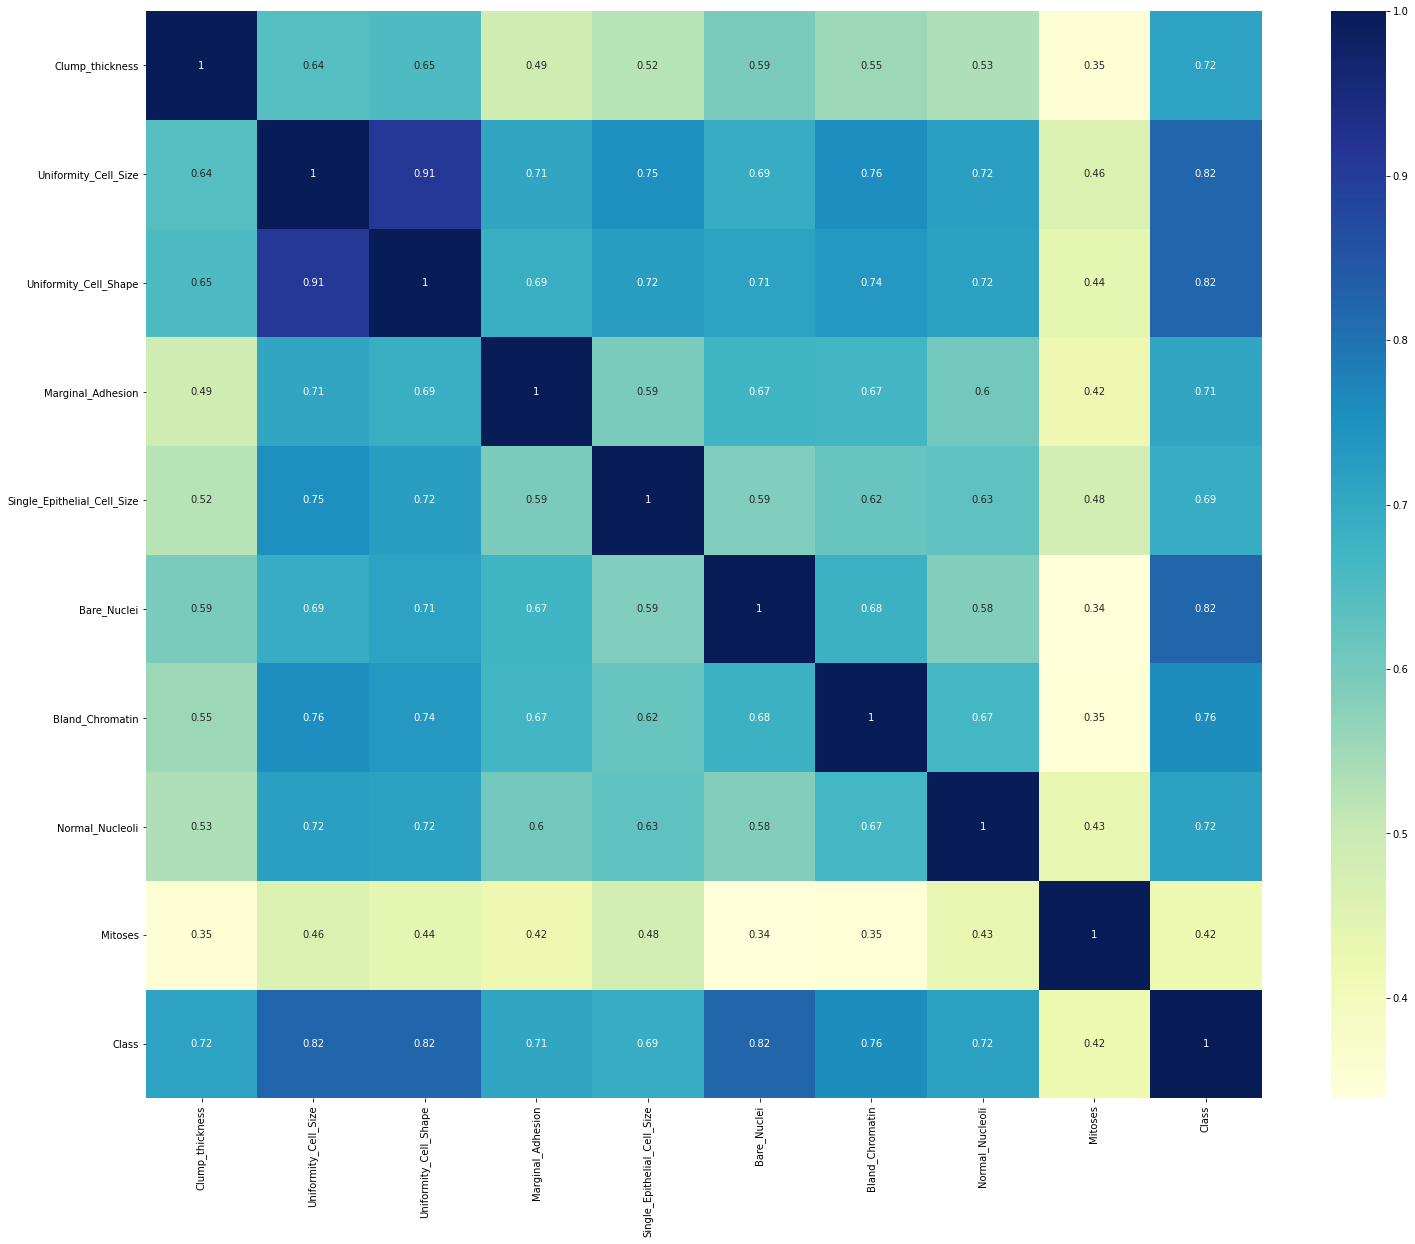

In [106]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu')

In [107]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Class'],axis=1)
y = df['Class']

In [108]:
X.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [109]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Class, dtype: int64

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [111]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
468,1,1,2,1,2,1,2,1,1
409,1,1,1,1,2,1,2,1,1
106,1,6,8,10,8,10,5,7,1
116,4,5,5,10,4,10,7,5,8
627,2,1,1,1,2,1,1,1,1


In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
knn_clf = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [114]:
y_pred = knn_clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [115]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[110   2]
 [  6  53]]


In [116]:
print(accuracy_score(y_test,y_pred))

0.9532163742690059


Number of Neighbors --------------3
------------Metrics-----------------
Accuracy----------0.9532163742690059
Precision---------0.9636363636363636
Recall------------0.8983050847457628
F1----------------0.9298245614035089


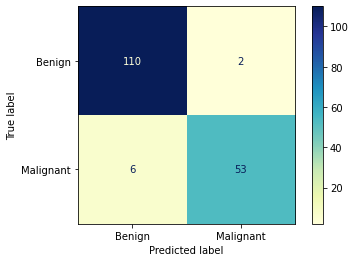

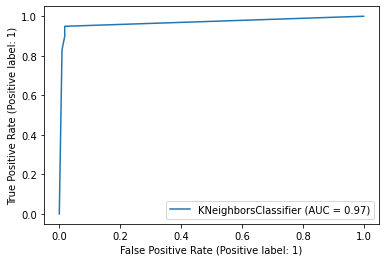

In [117]:
knn_clf = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Number of Neighbors --------------3')
print('------------Metrics-----------------')
print(f'Accuracy----------{accuracy}')
print(f'Precision---------{precision}')
print(f'Recall------------{recall}')
print(f'F1----------------{f1}')

plot_confusion_matrix(knn_clf, X_test, y_test, display_labels = ['Benign', 'Malignant'], cmap = 'YlGnBu')
plot_roc_curve(knn_clf, X_test, y_test)
plt.show()

In [118]:
# for i in range(3,10):
#     knn_clf = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'euclidean')
#     knn_clf.fit(X_train, y_train)
#     y_pred = knn_clf.predict(X_test)
#     cm = confusion_matrix(y_test,y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     print(f'Number of Neighbors --------{i}')
#     print('------------Metrics----------')
#     print(f'Accuracy----------{accuracy}')
#     print(f'Precision---------{precision}')
#     print(f'Recall------------{recall}')
#     print(f'F1----------------{f1}')
    
#     plot_confusion_matrix(knn_clf, X_test, y_test, display_labels = ['Benign', 'Malignant'], cmap = 'YlGnBu')
#     plot_roc_curve(knn_clf, X_test, y_test)
#     plt.show()

In [119]:
accuracy = {}

for i in range(3,30):
    knn_clf = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'euclidean')
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    accuracy.update({i:accuracy_score(y_test, y_pred)})
maxAccuracy = max(accuracy, key = accuracy.get)
print(maxAccuracy)

9


Number of Neighbors --------------9
------------Metrics-----------------
Accuracy----------0.9649122807017544
Precision---------0.9649122807017544
Recall------------0.9322033898305084
F1----------------0.9482758620689654


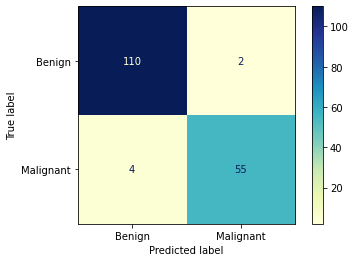

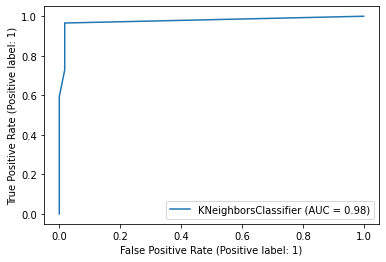

In [120]:
knn_clf = KNeighborsClassifier(n_neighbors = maxAccuracy, p = 2, metric = 'euclidean')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Number of Neighbors --------------{maxAccuracy}')
print('------------Metrics-----------------')
print(f'Accuracy----------{accuracy}')
print(f'Precision---------{precision}')
print(f'Recall------------{recall}')
print(f'F1----------------{f1}')

plot_confusion_matrix(knn_clf, X_test, y_test, display_labels = ['Benign', 'Malignant'], cmap = 'YlGnBu')
plot_roc_curve(knn_clf, X_test, y_test)
plt.show()

### Seeing What Happens Dropping Highly Correlated Columns
#### Shouldn't do much

In [121]:
df2 = df.copy()

In [122]:
df2.drop(['Uniformity_Cell_Size'], axis=1, inplace=True)
df2.drop(['Uniformity_Cell_Shape'], axis=1, inplace=True)
df2.drop(['Bare_Nuclei'], axis=1, inplace=True)
df2.head()

,Clump_thickness,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,5,7,3,2,1,0
1,3,1,2,3,1,1,0
2,6,1,3,3,7,1,0
3,4,3,2,3,1,1,0
4,8,8,7,9,7,1,1


In [123]:
X2 = df2.drop(['Class'],axis=1)
y2 = df2['Class']

In [124]:
X2_train = scaler.fit_transform(X_train)
X2_test = scaler.transform(X_test)

In [125]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, random_state=42)

In [126]:
accuracy2 = {}

for i in range(3,30):
    knn2_clf = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'euclidean')
    knn2_clf.fit(X2_train, y2_train)
    y2_pred = knn2_clf.predict(X2_test)
    accuracy2.update({i:accuracy_score(y2_test, y2_pred)})
maxAccuracy2 = max(accuracy2, key = accuracy2.get)
print(maxAccuracy2)

5


Number of Neighbors --------------5
------------Metrics-----------------
Accuracy----------0.9766081871345029
Precision---------1.0
Recall------------0.9322033898305084
F1----------------0.9649122807017544


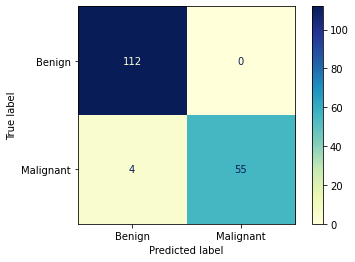

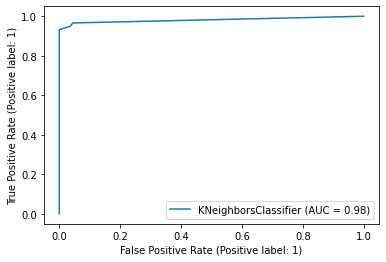

In [127]:
knn2_clf = KNeighborsClassifier(n_neighbors = maxAccuracy2, p = 2, metric = 'euclidean')
knn2_clf.fit(X2_train, y2_train)
y2_pred = knn2_clf.predict(X2_test)
cm = confusion_matrix(y2_test,y2_pred)
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred)
recall = recall_score(y2_test, y2_pred)
f1 = f1_score(y2_test, y2_pred)
print(f'Number of Neighbors --------------{maxAccuracy2}')
print('------------Metrics-----------------')
print(f'Accuracy----------{accuracy}')
print(f'Precision---------{precision}')
print(f'Recall------------{recall}')
print(f'F1----------------{f1}')

plot_confusion_matrix(knn2_clf, X2_test, y2_test, display_labels = ['Benign', 'Malignant'], cmap = 'YlGnBu')
plot_roc_curve(knn2_clf, X2_test, y2_test)
plt.show()

In [152]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors':[3,5,9,11,13,15],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [153]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

In [154]:
gs_results.best_score_

0.9785075195126595

Number of Neighbors --------------5
------------Metrics-----------------
Accuracy----------0.9590643274853801
Precision---------0.9642857142857143
Recall------------0.9152542372881356
F1----------------0.9391304347826087


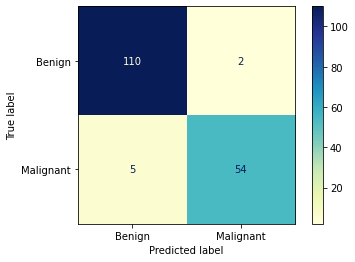

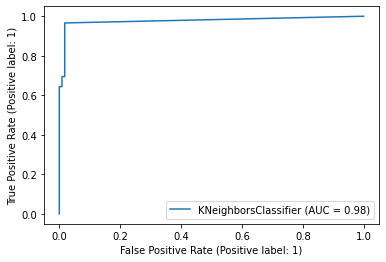

In [156]:
KNN_model = KNeighborsClassifier(n_neighbors=13, weights='distance',metric='manhattan',p=1)

KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Number of Neighbors --------------{maxAccuracy2}')
print('------------Metrics-----------------')
print(f'Accuracy----------{accuracy}')
print(f'Precision---------{precision}')
print(f'Recall------------{recall}')
print(f'F1----------------{f1}')

plot_confusion_matrix(KNN_model, X_test, y_test, display_labels = ['Benign', 'Malignant'], cmap = 'YlGnBu')
plot_roc_curve(KNN_model, X_test, y_test)
plt.show()
